In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data=[]
labels=[]
classes=43
cur_path=os.getcwd()

In [3]:
for i in range(classes):
    path=os.path.join(cur_path,'train',str(i))
    images=os.listdir(path)
    
    for a in images:
        try:
            image=Image.open(path+'\\'+a)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print('Error loading image')
data=np.array(data)
labels=np.array(labels)

In [4]:
print(data.shape,labels.shape)
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.3,random_state=101)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

(39209, 30, 30, 3) (39209,)
(27446, 30, 30, 3) (11763, 30, 30, 3) (27446,) (11763,)


In [5]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43,activation='softmax'))
#compilation of the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
epochs=15
history=model.fit(X_train,y_train,batch_size=64,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/15
429/429 [==============================] - 148s 335ms/step - loss: 5.1387 - accuracy: 0.2505 - val_loss: 0.4036 - val_accuracy: 0.9040
Epoch 2/15
429/429 [==============================] - 123s 286ms/step - loss: 0.7050 - accuracy: 0.8040 - val_loss: 0.1451 - val_accuracy: 0.9680
Epoch 3/15
429/429 [==============================] - 119s 277ms/step - loss: 0.3759 - accuracy: 0.8971 - val_loss: 0.1135 - val_accuracy: 0.9750
Epoch 4/15
429/429 [==============================] - 140s 327ms/step - loss: 0.2498 - accuracy: 0.9312 - val_loss: 0.0749 - val_accuracy: 0.9829
Epoch 5/15
429/429 [==============================] - 155s 360ms/step - loss: 0.1991 - accuracy: 0.9454 - val_loss: 0.0596 - val_accuracy: 0.9872
Epoch 6/15
429/429 [==============================] - 157s 366ms/step - loss: 0.1994 - accuracy: 0.9469 - val_loss: 0.0532 - val_accuracy: 0.9892
Epoch 7/15
429/429 [==============================] - 155s 361ms/step - loss: 0.1456 - accuracy: 0.9609 - val_loss: 0.0438 -

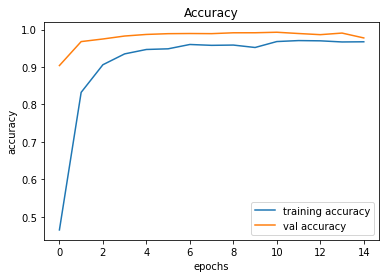

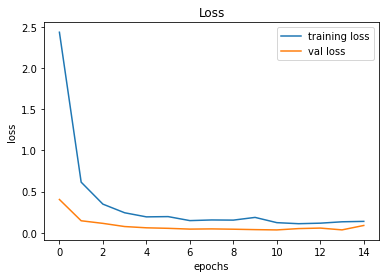

In [7]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [8]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test=pd.read_csv('Test.csv')
labels=y_test['ClassId'].values
imgs=y_test['Path'].values

data=[]

for img in imgs:
    image=Image.open(img)
    image=image.resize((30,30))
    data.append(np.array(image))
    
X_test=np.array(data)

pred=model.predict_classes(X_test)
#Accuracy with the test data

from sklearn.metrics import accuracy_score
print(accuracy_score(labels,pred))

C:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9534441805225653


In [9]:
model.save('traffic_classifier.h5')

In [12]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
from keras.models import load_model
model=load_model('traffic_classifier.h5')
import numpy

In [15]:
classes={ 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }
#initialize Gui
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic Sign classification')
top.configure(background='#00ffff')

label=Label(top,background='#CDCDCD',font=('arial',15,'bold'))
sign_image=Label(top)

def classify(file_path):
    global label_packedd
    image=Image.open(file_path)
    image=image.resize((30,30))
    image=numpy.expand_dims(image,axis=0)
    image=numpy.array(image)
    pred=model.predict_classes([image])[0]
    sign=classes[pred+1]
    print(sign)
    label.configure(foreground='#011638',text=sign)
    
def show_classify_button(file_path):
    classify_b=Button(top,text='Classify Image',command=lambda:classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156',foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
    
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text='Upload an Image',command=upload_image,padx=10,pady=5)
upload.configure(background='#364156',foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading=Label(top,text='Know Your Traffic Sign',pady=20,font=('arial',20,'bold'))

heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()

top.mainloop()